<a href="https://colab.research.google.com/github/Seeethy/Markowitz-portfolio-model-/blob/main/Markowitz_model_newest_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [235]:
import pandas_datareader.data as web
from datetime import date
import datetime
from dateutil.relativedelta import relativedelta
import itertools
import matplotlib.pyplot as plt
import pylab as plot
import numpy as np
import pandas as pd
import plotly.express as px 

In [236]:
companies = []
how_many = int(input("How many companies would you like to have in your portfolio?: "))
for c in range(how_many):
  company = input("Type the shortname of the company (it must be searchable in yahoo finance):  ")
  companies.append(company)

How many companies would you like to have in your portfolio?: 3
Type the shortname of the company (it must be searchable in yahoo finance):  PYPL
Type the shortname of the company (it must be searchable in yahoo finance):  CRM
Type the shortname of the company (it must be searchable in yahoo finance):  ATVI


In [237]:

today = date.today()
end_date = today.strftime("%Y-%m-%d")
two_years_from_today = date.today() - relativedelta(years=5)
start_date = two_years_from_today.strftime("%Y-%m-%d")
data_source= 'yahoo'

start_date = "2016-11-01"
end_date = "2020-09-01"

data_list = []
for i in range(len(companies)):
  data = web.DataReader(companies[i], data_source, start_date, end_date)
  data_list.append(data)

data = web.DataReader(companies, data_source, start_date, end_date)
adj_close = data["Adj Close"]
index = adj_close.index

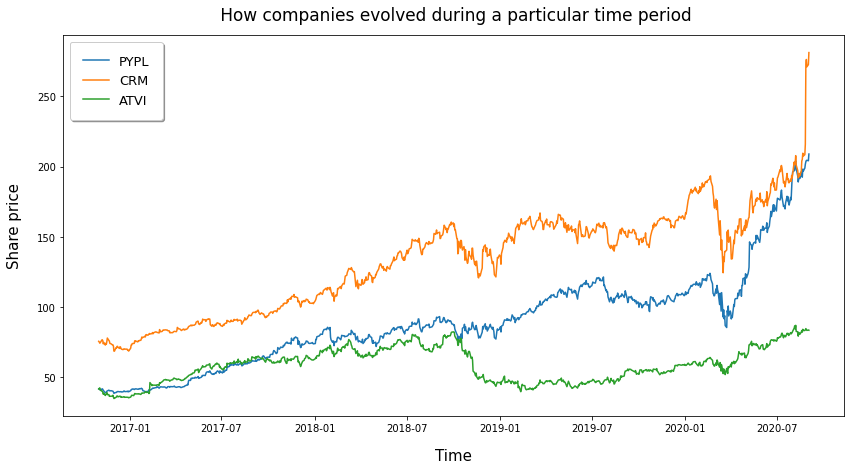

In [238]:

params = {'legend.fontsize': 13, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.figure(figsize=(14, 7))
plt.plot(index, adj_close)
plt.title(" How companies evolved during a particular time period",fontsize=17, pad = 15)
plt.xlabel("Time",fontsize=15,labelpad=15)
plt.ylabel("Share price",fontsize=15,labelpad=15)
plt.legend(companies, loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1) 
plt.show()

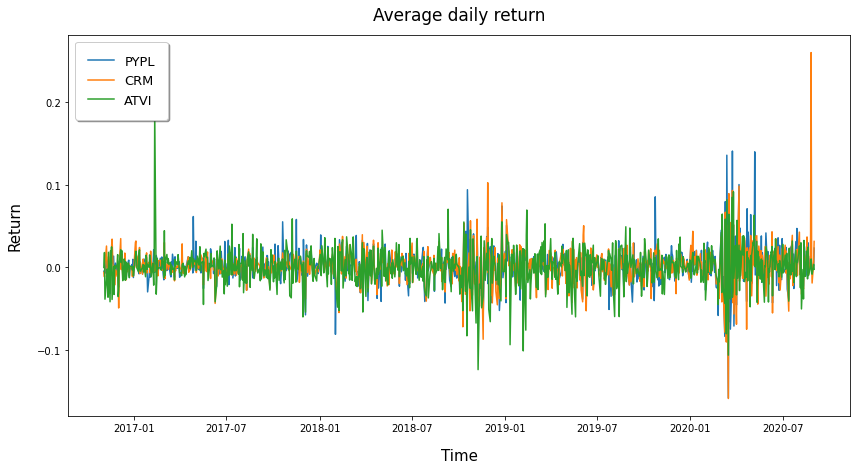

In [239]:
params = {'legend.fontsize': 13, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.figure(figsize=(14, 7))
plt.plot(index, adj_close.pct_change())
plt.title("Average daily return",fontsize=17, pad = 15)
plt.xlabel("Time",fontsize=15,labelpad=15)
plt.ylabel("Return",fontsize=15,labelpad=15)
plt.legend(companies, loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1) 
plt.show()


In [240]:
#np.log(average daily return)
log_returns = np.log(adj_close/adj_close.shift(1))
log_returns

Symbols,PYPL,CRM,ATVI
Date,,,
2016-11-01,NaN,NaN,NaN
2016-11-02,-0.004584,-0.005982,0.000000
2016-11-03,-0.003877,-0.011533,0.017914
2016-11-04,-0.007065,0.003097,-0.039267
2016-11-07,0.009248,0.025620,-0.014736
...,...,...,...
2020-08-26,0.008935,0.231468,0.010232
2020-08-27,0.004218,0.014582,-0.006889
2020-08-28,0.000685,-0.019072,-0.008258


In [241]:
# mean from average daily returns * trading days per year
log_returns.mean() * 252 

Symbols
PYPL    0.422268
CRM     0.343957
ATVI    0.182140
dtype: float64

In [242]:
# covariance from average daily returns * trading days per year
log_returns.cov() * 252

Symbols,PYPL,CRM,ATVI
Symbols,,,
PYPL,0.114902,0.077680,0.058876
CRM,0.077680,0.115382,0.058587
ATVI,0.058876,0.058587,0.130033


In [243]:
# correlation from average daily returns * trading days per year
log_returns.corr()

Symbols,PYPL,CRM,ATVI
Symbols,,,
PYPL,1.000000,0.674642,0.481671
CRM,0.674642,1.000000,0.478304
ATVI,0.481671,0.478304,1.000000


In [244]:
portfolio_returns = []
portfolio_volatilities = []
portfolio_weights = []

for x in range(10000):
    weights = np.random.random(len(companies))
    weights /= np.sum(weights)

    portfolio_weights.append(weights)
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 252)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights))))
                    
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

data_transposed = zip(portfolio_weights)
weights_in_dataframe = pd.DataFrame(data_transposed,columns=["Weights"])
weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1","Weight2","Weight3"])
weights_in_dataframee

,Weight1,Weight2,Weight3
0,0.313786,0.273138,0.413077
1,0.618596,0.135793,0.245611
2,0.374822,0.053045,0.572132
3,0.362600,0.535331,0.102069
4,0.481237,0.136514,0.382249
...,...,...,...
9995,0.411732,0.524518,0.063751
9996,0.312228,0.300865,0.386907
9997,0.027124,0.478831,0.494045
9998,0.202550,0.376808,0.420642


In [245]:
fig = px.scatter(x = portfolio_volatilities, y = portfolio_returns, width=1200, height=750, hover_data=[weights_in_dataframe],
                 labels={'x': "Expected Volatility", 'y': "Expected Return",'hover_data_0': "Weights"})
fig.update_traces(marker=dict(size = 2))
fig.show()  

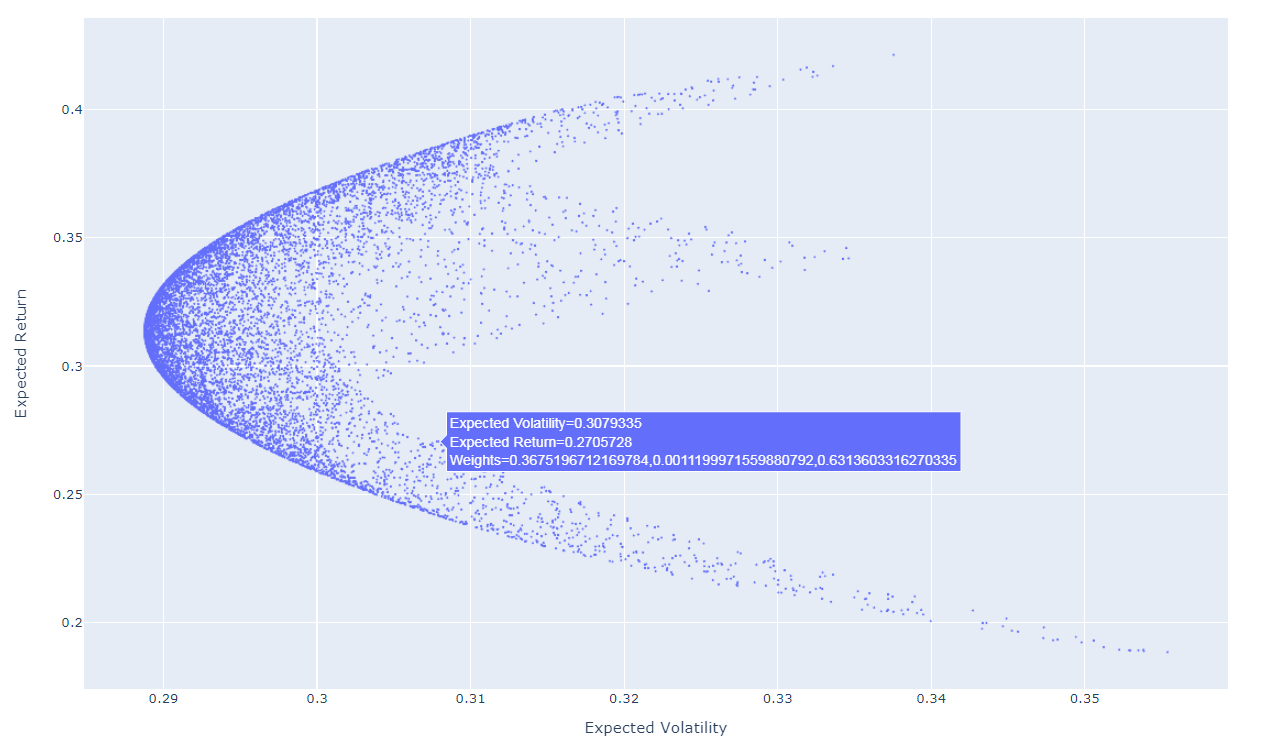

In [280]:
# minimum volatility portfolio
d = {'Volatility':portfolio_volatilities,'Returns':portfolio_returns}
m_v_p = pd.DataFrame(d)

m_v_p.reset_index(drop=True, inplace=True)
weights_in_dataframee.reset_index(drop=True, inplace=True)
 
portfolio = pd.concat([m_v_p,weights_in_dataframee],axis=1)

minimum = portfolio.loc[portfolio['Volatility'] == min(portfolio['Volatility'])]

mini = minimum[minimum.columns[0:2]]

print("The minimum volatility portfolio contains: \n")
minimum.iloc[0]

The minimum volatility portfolio contains: 



Volatility    0.288763
Returns       0.314058
Weight1       0.330130
Weight2       0.325331
Weight3       0.344539
Name: 5397, dtype: float64

In [281]:
# optimal risk portfolio
rf = 0.01
opt_risk = portfolio.iloc[((portfolio['Returns'] - rf) / portfolio['Volatility']).idxmax()]
print("The optimal risk portfolio contains: \n")
print(opt_risk)


The optimal risk portfolio contains: 

Volatility    0.319387
Returns       0.404611
Weight1       0.780025
Weight2       0.217313
Weight3       0.002662
Name: 5873, dtype: float64


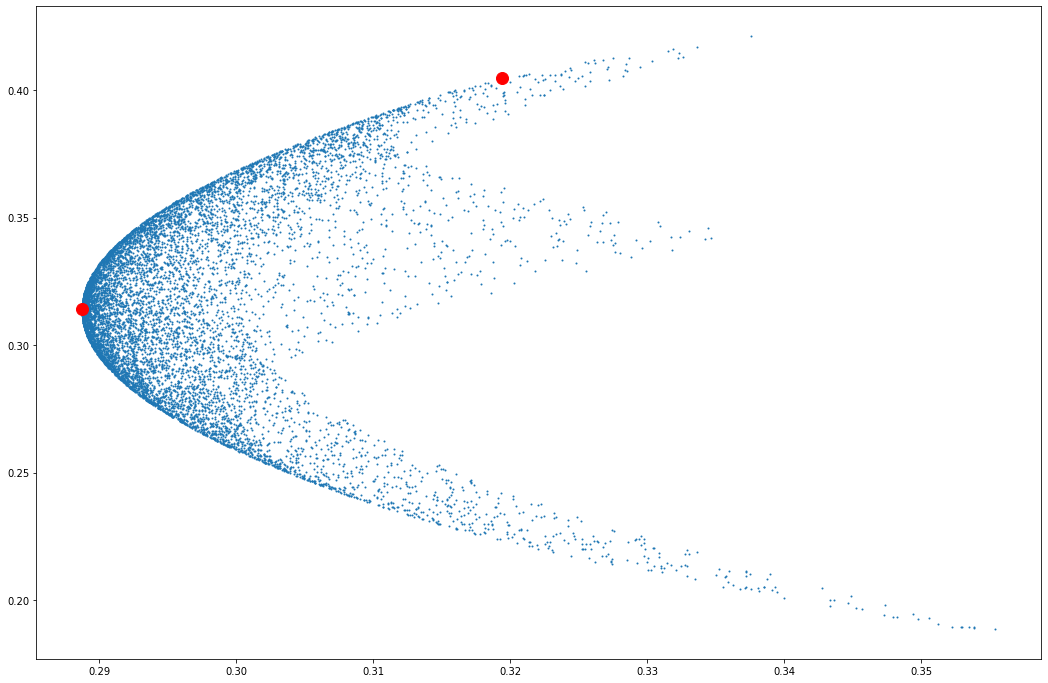

In [282]:
plt.scatter(portfolio_volatilities,portfolio_returns,s = 1)
plt.rcParams["figure.figsize"] = (18, 12)
plt.plot(mini['Volatility'],mini['Returns'],'ro',markersize = 12)
plt.plot(opt_risk['Volatility'],opt_risk['Returns'],'ro',markersize = 12)
plt.show()